In [1]:
import sys
sys.path.append('../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4]

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.TremorModelTrainer(config, subject="Brian")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../Results/Baseline_results_train_with_{K}data_B.csv')
# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
(8532, 4, 14, 1) (8532,) (86, 4, 14, 1) (86,)
Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 77.39%
Maximum validation accuracy : 83.72%
Accuracy of test dataset using model V0: 83.7209%
Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.9832%
Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
There is more than one dataset - check - C:/Users/hml76/OneDrive/문서/MATLAB/Data_Brian/Exp_2025-07-09-v2/E9AD0E7DCC2B//raw/ - ['1/', '2/', '3/', '4/', '5/']
Accuracy on unseen dataset: 84.2826%
Dataset 5/6 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.0890%
Dataset 6/6 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.9205%
Results saved to ../Results/Baseline_results_train_with_1data_B.csv


Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
(8532, 4,

In [6]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '4']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Baseline_results_train_with_{K}data_B.csv')

SUBJECT = "Brian"


Dataset 1/6 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 77.65%
Maximum validation accuracy : 81.2%

Dataset 2/6 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 81.22%
Maximum validation accuracy : 87.53%

Dataset 3/6 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.02%
Maximum validation accuracy : 89.49%

Dataset 4/6 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
There is more than one dataset - check - C:/Users/hml76/OneDrive/문서/MATLAB/Data_Brian/Exp_2025-07-09-v2/E9AD0E7DCC2B/raw/ - ['1/', '2/', '3/', '4/', '5/']
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.89%
Maximum validation accuracy : 87.17%

Dataset 5/6 - Session Exp_2025-07

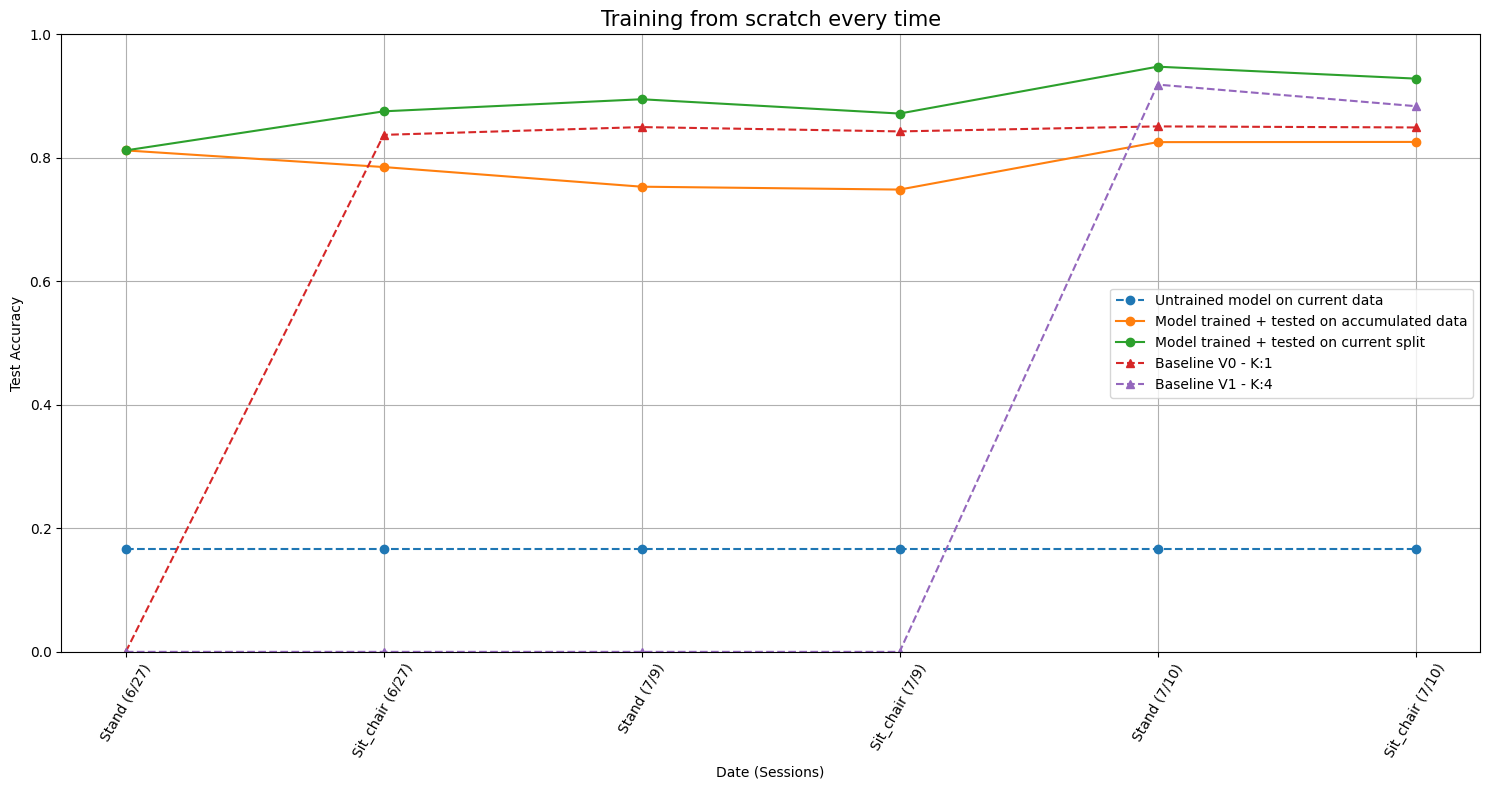

Average of acc without training anything (should be random): 3.82%
Average of acc using previous test data after training: 88.83%
Average of acc using current test data after training: 79.17%
Baseline K-1: 84.60%
Baseline K-4: 90.12%


In [7]:
import Target

prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")